In [9]:
from functions import *
import numpy as np

## ALL

In [10]:
RS_composite_all = RiskScore.load('RS_composite_lab.tar.gz')

Successfully loaded file: ./RS_composite_lab.pkl
Successfully uploaded DeepSurv model from folder: ./RS_composite_lab_DeepSurv_model


In [15]:
RS_composite_all.X_train.to_pickle('RS_composite_all_X_TRAIN')
np.savetxt('RS_composite_all.T_train.txt', RS_composite_all.T_train, fmt='%d')
np.savetxt('RS_composite_all.E_train.txt', RS_composite_all.E_train, fmt='%d')

RS_composite_all.X_test.to_pickle('RS_composite_all_X_test')
np.savetxt('RS_composite_all.T_test.txt', RS_composite_all.T_test, fmt='%d')
np.savetxt('RS_composite_all.E_test.txt', RS_composite_all.E_test, fmt='%d')

sub_dataset_all = RS_composite_all.X_train.assign(T=RS_composite_all.T_train, E=RS_composite_all.E_train)
sub_dataset_all

sub_coxph_all = CoxPHFitter(penalizer = 0.1)
sub_coxph_all.fit(sub_dataset_all, duration_col='T', event_col='E')

np.savetxt('RS_composite_all.pred_score.dsv.train.txt', RS_composite_all.deep_surv.predict_risk(RS_composite_all.X_train)[:,0])
np.savetxt('RS_composite_all.pred_score.dsv.test.txt', RS_composite_all.deep_surv.predict_risk(RS_composite_all.X_test)[:,0])
np.savetxt('RS_composite_all.pred_score.cox.train.txt', sub_coxph_all.predict_partial_hazard(RS_composite_all.X_train).values.flatten())
np.savetxt('RS_composite_all.pred_score.cox.test.txt', sub_coxph_all.predict_partial_hazard(RS_composite_all.X_test).values.flatten())

In [17]:
#evaluation_prms = {}
#evaluation_prms.setdefault('n_bootstrap', 10)
#RS_composite_all.deep_surv.evaluate(RS_composite_all.X_train,
#                                    RS_composite_all.E_train,
#                                    RS_composite_all.T_train,
#                                    RS_composite_all.X_test,
#                                    RS_composite_all.E_test,
#                                    RS_composite_all.T_test,
#                                    evaluation_prms)
#                         
print(len(RS_composite_all.deep_surv.predict_risk(RS_composite_all.X_train)[:,0]))
print(len(RS_composite_all.E_train))

452293
452293


In [5]:
n,p = RS_composite_all.X_train.shape
temp_score = RS_composite_all.deep_surv.predict_risk(np.zeros([n,p]))
c_index_bootstrap(RS_composite_all.T_train, RS_composite_all.E_train, temp_score[:,0], n_bootstrap=10)

(0.5, 0.5, 0.0, 0.5, 0.5)

In [ ]:
#RS_composite_all.X_train.assign(T=RS_composite_all.T_train, E=RS_composite_all.E_train)

## jacobian

In [172]:
def get_Jacobian(RS_composite_all,eps=1e-3):
    n,p = RS_composite_all.X_train.shape
    J = np.zeros([n,p])
    for i in range(p):
        #print(i)
        x0 = RS_composite_all.X_train.copy()
        x1 = RS_composite_all.X_train.copy()
        x0.iloc[:,i] = x0.iloc[:,i] - eps
        x1.iloc[:,i] = x1.iloc[:,i] + eps
        J[:,i:i+1] = ((RS_composite_all.deep_surv.predict_risk(x1) \
                      - RS_composite_all.deep_surv.predict_risk(x0))/(2.0*eps))[:,0:0+1]
    return J

J = get_Jacobian(RS_composite_all)

#n,p = RS_composite_all.X_train.shape
#J = np.zeros([n,p])
#x0.iloc[:,1] - 0.001 
##for i in range(p):
##    print(i)
##    x0 = RS_composite_all.X_train.copy()
##    x1 = RS_composite_all.X_train.copy()
##    x0[:,i] = x0[:,i] - eps
##    x1[:,i] = x1[:,i] + eps
##    J[:,i:i+1] = (RS_composite_all.deep_surv.predict_risk(x1) \
##                  - RS_composite_all.deep_surv.predict_risk(x0))/(2.0*eps)

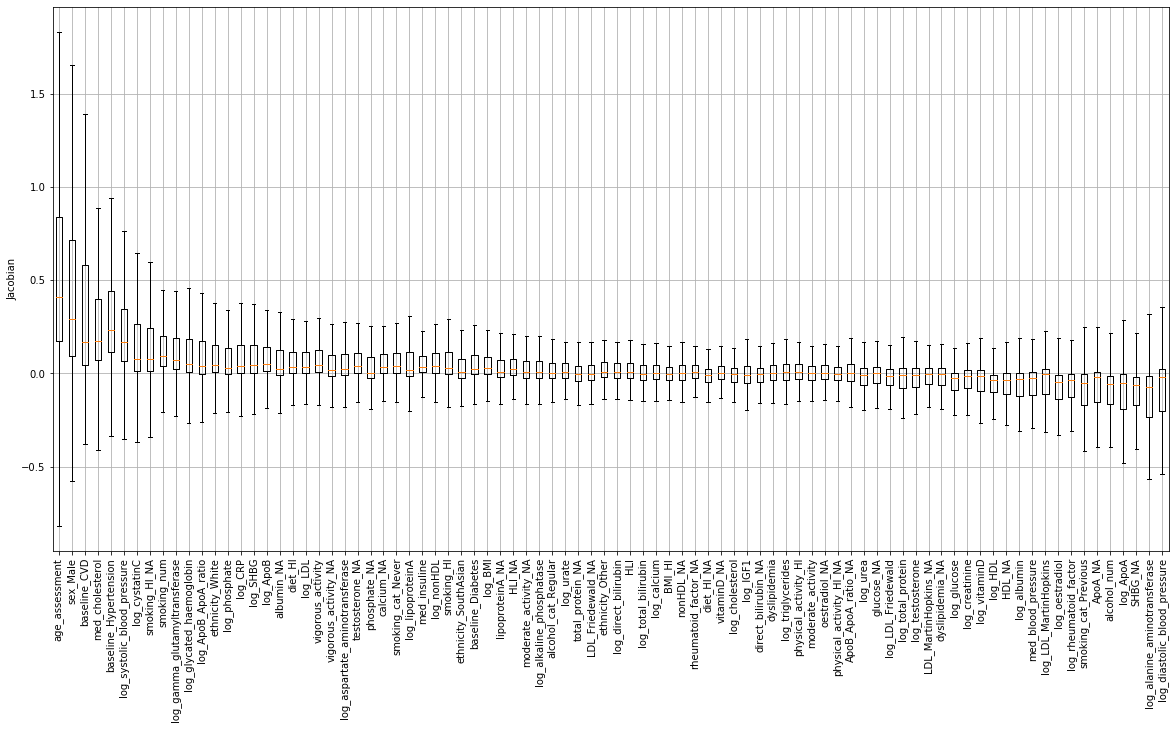

In [173]:
#plotting jacobian
xlb = RS_composite_all.X_train.columns
#lst = np.argsort(-np.sum(np.abs(J),axis=0))
lst = np.argsort(-np.sum((J),axis=0))
plt.figure(figsize=[20,10])
plt.boxplot(J[:,lst], showfliers=False)
plt.grid()
plt.xticks(np.arange(len(xlb))+1,xlb[lst],rotation='vertical')
plt.ylabel('Jacobian')
plt.show()

#xlb = RS_composite_all.X_train.columns
#lst = np.argsort(-np.sum(np.abs(J),axis=0))
#plt.figure(figsize=[20,10])
##plt.boxplot(J[:,lst])
#plt.boxplot(J[:,lst[0:10]])
#plt.grid()
#plt.xticks(np.arange(len(xlb[0:10]))+1,xlb[lst][0:10],rotation='vertical')
#plt.ylabel('Jacobian')
#plt.show()

# sans base

In [174]:
RS_composite_all = RiskScore.load('RS_composite_sans_base.tar.gz')

Successfully loaded file: ./RS_composite_sans_base.pkl
Successfully uploaded DeepSurv model from folder: ./RS_composite_sans_base_DeepSurv_model


In [ ]:
#RS_composite_all.X_train.assign(T=RS_composite_all.T_train, E=RS_composite_all.E_train)

In [131]:
scores = RS_composite_all.deep_surv.predict_risk(RS_composite_all.X_train)

#print(scores.shape)
#print(RS_composite_all.E_train.shape)
#print(RS_composite_all.T_train.shape)
#print(RS_composite_all.deep_surv.n_outcomes)
#print(RS_composite_all.T_train[0])
#print(RS_composite_all.E_train[0])
#print(scores[:,0])
#print(scores)

#print(RS_composite_all.T_train.shape)
#print(RS_composite_all.E_train.shape)
#print(scores.shape)

#(0.792239317709603,
# 0.7917940801670866,
# 5.588573729132795e-07,
# 0.7905853165081422,
# 0.7929292183760813)

i = 0
c_index_bootstrap(RS_composite_all.T_train, RS_composite_all.E_train, scores[:,0], n_bootstrap=10)

(0.792239317709603,
 0.7924382522686206,
 2.6901870045963726e-06,
 0.7896989171006334,
 0.7948879295955957)

## jacobian

In [175]:
def get_Jacobian(RS_composite_all,eps=1e-3):
    n,p = RS_composite_all.X_train.shape
    J = np.zeros([n,p])
    for i in range(p):
        #print(i)
        x0 = RS_composite_all.X_train.copy()
        x1 = RS_composite_all.X_train.copy()
        x0.iloc[:,i] = x0.iloc[:,i] - eps
        x1.iloc[:,i] = x1.iloc[:,i] + eps
        J[:,i:i+1] = ((RS_composite_all.deep_surv.predict_risk(x1) \
                      - RS_composite_all.deep_surv.predict_risk(x0))/(2.0*eps))[:,0:0+1]
    return J

J = get_Jacobian(RS_composite_all)

#n,p = RS_composite_all.X_train.shape
#J = np.zeros([n,p])
#x0.iloc[:,1] - 0.001 
##for i in range(p):
##    print(i)
##    x0 = RS_composite_all.X_train.copy()
##    x1 = RS_composite_all.X_train.copy()
##    x0[:,i] = x0[:,i] - eps
##    x1[:,i] = x1[:,i] + eps
##    J[:,i:i+1] = (RS_composite_all.deep_surv.predict_risk(x1) \
##                  - RS_composite_all.deep_surv.predict_risk(x0))/(2.0*eps)

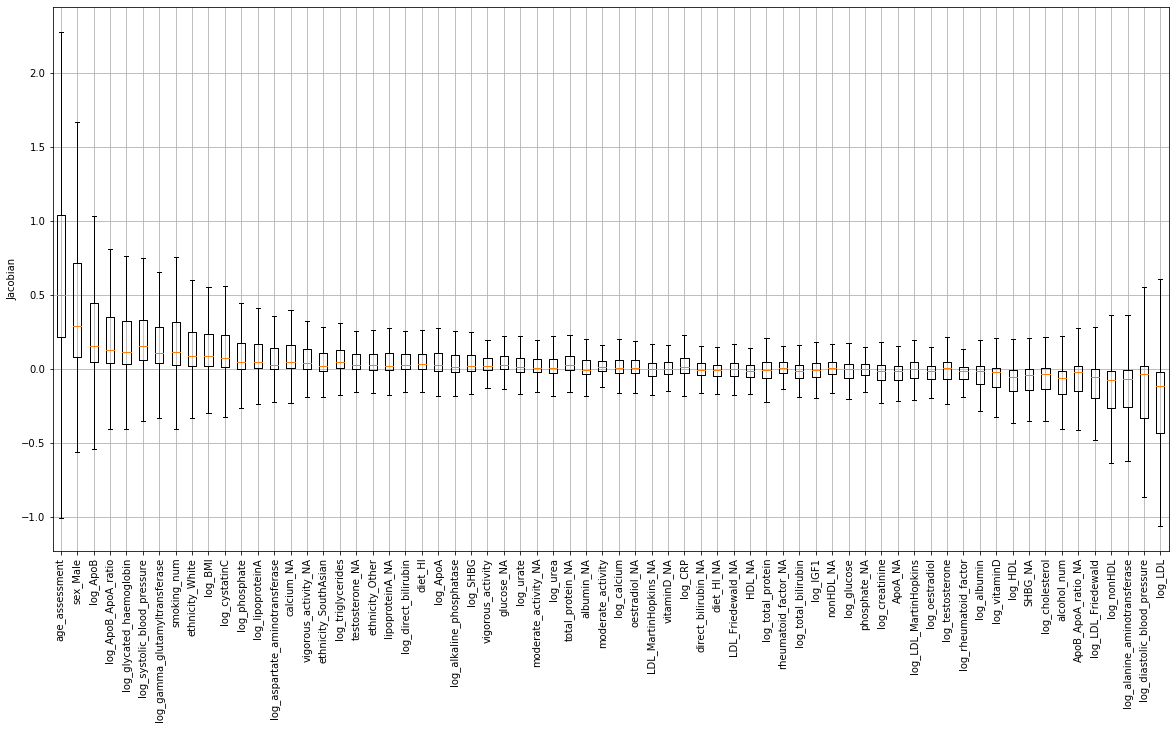

In [176]:
#plotting jacobian
xlb = RS_composite_all.X_train.columns
#lst = np.argsort(-np.sum(np.abs(J),axis=0))
lst = np.argsort(-np.sum((J),axis=0))
plt.figure(figsize=[20,10])
plt.boxplot(J[:,lst], showfliers=False)
plt.grid()
plt.xticks(np.arange(len(xlb))+1,xlb[lst],rotation='vertical')
plt.ylabel('Jacobian')
plt.show()

#xlb = RS_composite_all.X_train.columns
#lst = np.argsort(-np.sum(np.abs(J),axis=0))
#plt.figure(figsize=[20,10])
##plt.boxplot(J[:,lst])
#plt.boxplot(J[:,lst[0:10]])
#plt.grid()
#plt.xticks(np.arange(len(xlb[0:10]))+1,xlb[lst][0:10],rotation='vertical')
#plt.ylabel('Jacobian')
#plt.show()

## using jacobian to get smaller model               

In [ ]:
############################################################
## using jacobian to get smaller model               
############################################################

from lifelines.utils import concordance_index

#j_mtx = pd.DataFrame(J[:,lst])
#j_mtx.columns = xlb[lst]
#j_mtx
xlb[lst][:-len(xlb)]
xlb[lst][:-1]
#xlb[lst]


scores = RS_composite_all.deep_surv.predict_risk(RS_composite_all.X_train)
stacked_arr = np.stack((RS_composite_all.T_train, -scores[:,0], RS_composite_all.E_train), axis=-1)
c_idx_boot = np.array([concordance_index(*resample(stacked_arr).T) for _ in range(10)])

In [163]:
for i in range(3,len(xlb)-1):
    tempX = RS_composite_all.X_train.copy()
    tempX[xlb[lst][len(xlb)-i:len(xlb)]] = 0
    print(xlb[lst][len(xlb)-i:len(xlb)])
    scores2 = RS_composite_all.deep_surv.predict_risk(tempX)
    stacked_arr2 = np.stack((RS_composite_all.T_train, -scores2[:,0], RS_composite_all.E_train), axis=-1)
    c_idx_boot2 = np.array([concordance_index(*resample(stacked_arr2).T) for _ in range(10)])
    
    c_idx_boot2
    ttest_pval = (stats.ttest_ind(c_idx_boot,c_idx_boot2))
    if ttest_pval[1] < 0.05:
        print('DONE')
        print(i)
        break

Index(['moderate_activity', 'vigorous_activity', 'ethnicity_Other'], dtype='object')
Index(['rheumatoid_factor_NA', 'moderate_activity', 'vigorous_activity',
       'ethnicity_Other'],
      dtype='object')
DONE
4


array([0.78911499, 0.78887019, 0.78922732, 0.79327414, 0.78963259,
       0.78974053, 0.78862193, 0.78797955, 0.79067856, 0.78874746])

In [148]:
from scipy import stats
print(stats.ttest_ind(c_idx_boot,c_idx_boot2))
ttest_pval = (stats.ttest_ind(c_idx_boot,c_idx_boot2))
ttest_pval[1]
stacked_arr
#print(c_idx_boot)
#print(c_idx_boot2)
print(xlb[lst][:len(xlb)])
print(xlb[lst][len(xlb)-1:len(xlb)])

Ttest_indResult(statistic=90.53307730335644, pvalue=2.162970934786863e-25)
Index(['age_assessment', 'sex_Male', 'log_LDL', 'log_ApoB',
       'log_diastolic_blood_pressure', 'smoking_num', 'log_ApoB_ApoA_ratio',
       'log_glycated_haemoglobin', 'log_systolic_blood_pressure',
       'log_alanine_aminotransferase', 'log_nonHDL',
       'log_gamma_glutamyltransferase', 'log_cystatinC', 'log_BMI',
       'log_LDL_Friedewald', 'log_cholesterol', 'ApoB_ApoA_ratio_NA',
       'alcohol_num', 'log_phosphate', 'vigorous_activity_NA',
       'log_lipoproteinA', 'log_HDL', 'log_aspartate_aminotransferase',
       'log_testosterone', 'log_creatinine', 'log_LDL_MartinHopkins',
       'log_vitaminD', 'log_CRP', 'log_ApoA', 'SHBG_NA', 'log_triglycerides',
       'log_albumin', 'lipoproteinA_NA', 'ApoA_NA', 'log_total_protein',
       'ethnicity_White', 'nonHDL_NA', 'log_urea', 'log_urate',
       'log_alkaline_phosphatase', 'moderate_activity_NA',
       'log_direct_bilirubin', 'log_IGF1', 'log_SHBG

In [121]:
tempX = RS_composite_all.X_train
tempX[xlb[lst][:3]] = 0
tempX[xlb[lst][:3]]
#RS_composite_all.E_train
#c_idx_boot

,age_assessment,sex_Male,log_LDL
id,,,
4632442,0.0,0.0,0.0
4971067,0.0,0.0,0.0
1314319,0.0,0.0,0.0
3938100,0.0,0.0,0.0
2684128,0.0,0.0,0.0
...,...,...,...
2588080,0.0,0.0,0.0
5065545,0.0,0.0,0.0
4876607,0.0,0.0,0.0


In [84]:
import pandas as pd
#pd.DataFrame(J).median(axis = 0)
j_mtx = pd.DataFrame(J)
j_mtx.columns = xlb
j_mtx.median(axis = 0).sort_values()

log_LDL                        -0.112265
log_nonHDL                     -0.075549
log_alanine_aminotransferase   -0.070095
alcohol_num                    -0.058532
log_HDL                        -0.051245
                                  ...   
log_ApoB_ApoA_ratio             0.127643
log_systolic_blood_pressure     0.154078
log_ApoB                        0.155836
sex_Male                        0.290826
age_assessment                  0.498027
Length: 68, dtype: float64

In [30]:
#evaluation_prms = {}
#evaluation_prms.setdefault('n_bootstrap', 10)
#RS_composite_all.deep_surv.evaluate(RS_composite_all.X_train,
#                                    RS_composite_all.E_train,
#                                    RS_composite_all.T_train,
#                                    RS_composite_all.X_test,
#                                    RS_composite_all.E_test,
#                                    RS_composite_all.T_test,
#                                    evaluation_prms)
#                                    

In [ ]:
def get_importance(RS_composite_all,eps=1e-3):
    n,p = RS_composite_all.X_train.shape
    J = np.zeros([n,p])
    x = RS_composite_all.deep_surv.predict_risk(RS_composite_all.X_train)
    for i in range(p):
        print(i)
        x0 = RS_composite_all.X_train.copy()
        x0.iloc[:,i] = 0
        #import pdb; pdb.set_trace()
        J[:,i:i+1] = (x - \
                       RS_composite_all.deep_surv.predict_risk(x0))[:,0:0+1]
    return J

importance = get_importance(RS_composite_all)

In [98]:
n,p = RS_composite_all.X_train.shape
temp_score = RS_composite_all.deep_surv.predict_risk(np.zeros([n,p]))
c_index_bootstrap(RS_composite_all.T_train, RS_composite_all.E_train, temp_score[:,0], n_bootstrap=10)

(0.5, 0.5, 0.0, 0.5, 0.5)

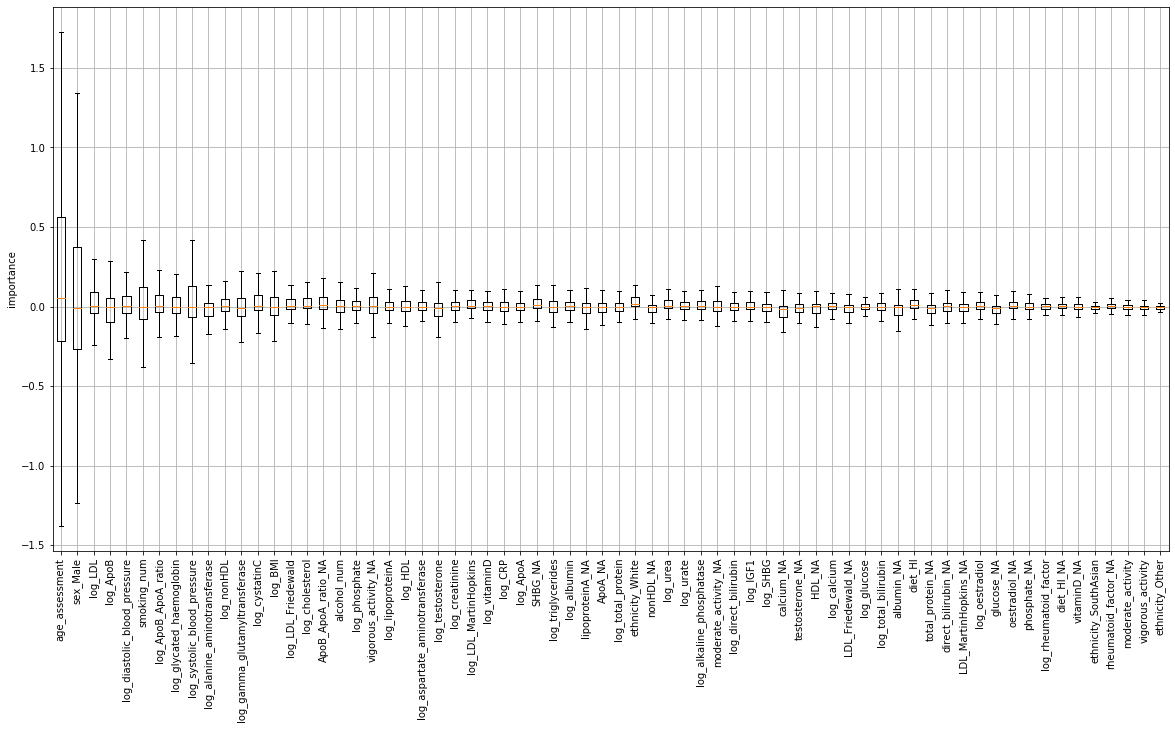

In [94]:
xlb = RS_composite_all.X_train.columns
lst = np.argsort(-np.sum(np.abs(importance),axis=0))
plt.figure(figsize=[20,10])
plt.boxplot(importance[:,lst], showfliers=False)
plt.grid()
plt.xticks(np.arange(len(xlb))+1,xlb[lst],rotation='vertical')
plt.ylabel('importance')
plt.show()

# Lab only

In [167]:
RS_composite_all = RiskScore.load('RS_composite_lab.tar.gz')

Successfully loaded file: ./RS_composite_lab.pkl
Successfully uploaded DeepSurv model from folder: ./RS_composite_lab_DeepSurv_model


## jacobian

In [168]:
def get_Jacobian(RS_composite_all,eps=1e-3):
    n,p = RS_composite_all.X_train.shape
    J = np.zeros([n,p])
    for i in range(p):
        #print(i)
        x0 = RS_composite_all.X_train.copy()
        x1 = RS_composite_all.X_train.copy()
        x0.iloc[:,i] = x0.iloc[:,i] - eps
        x1.iloc[:,i] = x1.iloc[:,i] + eps
        J[:,i:i+1] = ((RS_composite_all.deep_surv.predict_risk(x1) \
                      - RS_composite_all.deep_surv.predict_risk(x0))/(2.0*eps))[:,0:0+1]
    return J

J = get_Jacobian(RS_composite_all)

#n,p = RS_composite_all.X_train.shape
#J = np.zeros([n,p])
#x0.iloc[:,1] - 0.001 
##for i in range(p):
##    print(i)
##    x0 = RS_composite_all.X_train.copy()
##    x1 = RS_composite_all.X_train.copy()
##    x0[:,i] = x0[:,i] - eps
##    x1[:,i] = x1[:,i] + eps
##    J[:,i:i+1] = (RS_composite_all.deep_surv.predict_risk(x1) \
##                  - RS_composite_all.deep_surv.predict_risk(x0))/(2.0*eps)

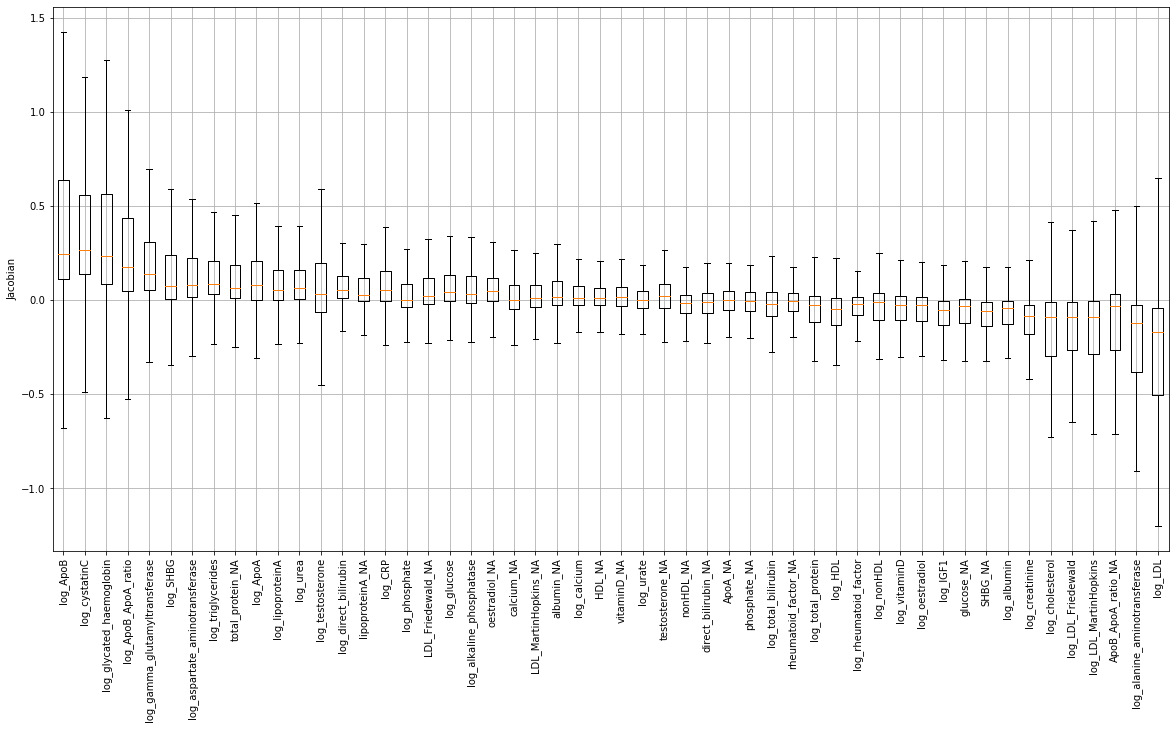

In [170]:
#plotting jacobian
xlb = RS_composite_all.X_train.columns
#lst = np.argsort(-np.sum(np.abs(J),axis=0))
lst = np.argsort(-np.sum((J),axis=0))
plt.figure(figsize=[20,10])
plt.boxplot(J[:,lst], showfliers=False)
plt.grid()
plt.xticks(np.arange(len(xlb))+1,xlb[lst],rotation='vertical')
plt.ylabel('Jacobian')
plt.show()

#xlb = RS_composite_all.X_train.columns
#lst = np.argsort(-np.sum(np.abs(J),axis=0))
#plt.figure(figsize=[20,10])
##plt.boxplot(J[:,lst])
#plt.boxplot(J[:,lst[0:10]])
#plt.grid()
#plt.xticks(np.arange(len(xlb[0:10]))+1,xlb[lst][0:10],rotation='vertical')
#plt.ylabel('Jacobian')
#plt.show()

# Lab demo

In [6]:
RS_composite_all = RiskScore.load('RS_composite_lab_demo.tar.gz')

Successfully loaded file: ./RS_composite_lab_demo.pkl
Successfully uploaded DeepSurv model from folder: ./RS_composite_lab_demo_DeepSurv_model


## jacobian

In [7]:
def get_Jacobian(RS_composite_all,eps=1e-3):
    n,p = RS_composite_all.X_train.shape
    J = np.zeros([n,p])
    for i in range(p):
        #print(i)
        x0 = RS_composite_all.X_train.copy()
        x1 = RS_composite_all.X_train.copy()
        x0.iloc[:,i] = x0.iloc[:,i] - eps
        x1.iloc[:,i] = x1.iloc[:,i] + eps
        J[:,i:i+1] = ((RS_composite_all.deep_surv.predict_risk(x1) \
                      - RS_composite_all.deep_surv.predict_risk(x0))/(2.0*eps))[:,0:0+1]
    return J

J = get_Jacobian(RS_composite_all)

#n,p = RS_composite_all.X_train.shape
#J = np.zeros([n,p])
#x0.iloc[:,1] - 0.001 
##for i in range(p):
##    print(i)
##    x0 = RS_composite_all.X_train.copy()
##    x1 = RS_composite_all.X_train.copy()
##    x0[:,i] = x0[:,i] - eps
##    x1[:,i] = x1[:,i] + eps
##    J[:,i:i+1] = (RS_composite_all.deep_surv.predict_risk(x1) \
##                  - RS_composite_all.deep_surv.predict_risk(x0))/(2.0*eps)

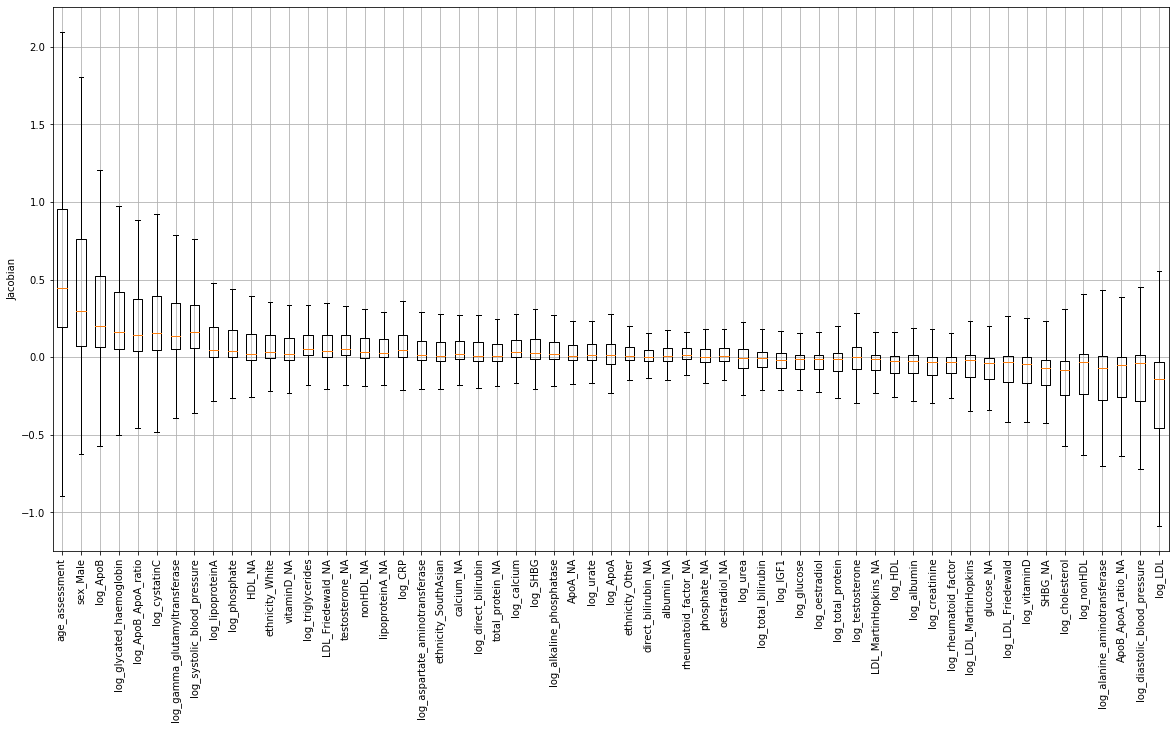

In [8]:
#plotting jacobian
xlb = RS_composite_all.X_train.columns
#lst = np.argsort(-np.sum(np.abs(J),axis=0))
lst = np.argsort(-np.sum((J),axis=0))
plt.figure(figsize=[20,10])
plt.boxplot(J[:,lst], showfliers=False)
plt.grid()
plt.xticks(np.arange(len(xlb))+1,xlb[lst],rotation='vertical')
plt.ylabel('Jacobian')
plt.show()

#xlb = RS_composite_all.X_train.columns
#lst = np.argsort(-np.sum(np.abs(J),axis=0))
#plt.figure(figsize=[20,10])
##plt.boxplot(J[:,lst])
#plt.boxplot(J[:,lst[0:10]])
#plt.grid()
#plt.xticks(np.arange(len(xlb[0:10]))+1,xlb[lst][0:10],rotation='vertical')
#plt.ylabel('Jacobian')
#plt.show()